In [439]:
import nltk
import spacy
import pandas as pd
import numpy as np
import json

In [440]:
# Load the spacy model: nlp
nlp = spacy.load('en_core_web_sm')

In [441]:
# load presidential speeches from nltk
from nltk.corpus import inaugural
speeches = inaugural.fileids()
speeches

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [442]:
for speech in speeches:
    # raw text
    # print(speech)
    print(speech + '\n', len(inaugural.raw(speech)))

1789-Washington.txt
 8619
1793-Washington.txt
 791
1797-Adams.txt
 13877
1801-Jefferson.txt
 10137
1805-Jefferson.txt
 12908
1809-Madison.txt
 7001
1813-Madison.txt
 7157
1817-Monroe.txt
 19887
1821-Monroe.txt
 26326
1825-Adams.txt
 17741
1829-Jackson.txt
 6817
1833-Jackson.txt
 7058
1837-VanBuren.txt
 23417
1841-Harrison.txt
 49700
1845-Polk.txt
 28716
1849-Taylor.txt
 6605
1853-Pierce.txt
 20081
1857-Buchanan.txt
 16815
1861-Lincoln.txt
 21017
1865-Lincoln.txt
 3926
1869-Grant.txt
 6503
1873-Grant.txt
 7734
1877-Hayes.txt
 14938
1881-Garfield.txt
 17767
1885-Cleveland.txt
 10145
1889-Harrison.txt
 26179
1893-Cleveland.txt
 12349
1897-McKinley.txt
 23659
1901-McKinley.txt
 13408
1905-Roosevelt.txt
 5568
1909-Taft.txt
 32164
1913-Wilson.txt
 9563
1917-Wilson.txt
 8395
1921-Harding.txt
 20298
1925-Coolidge.txt
 23949
1929-Hoover.txt
 21764
1933-Roosevelt.txt
 10903
1937-Roosevelt.txt
 10607
1941-Roosevelt.txt
 7571
1945-Roosevelt.txt
 3039
1949-Truman.txt
 13679
1953-Eisenhower.txt
 139

In [443]:
speeches[13]

'1841-Harrison.txt'

In [444]:
# loading presidents.json
with open('presidents.json') as f:
    presidents = json.load(f)

In [445]:
i, j = 0, 0
keys = list(presidents.keys())
president_length = len(keys)
speeches_length = len(speeches)
while True:
    try:
        speech = speeches[i]
        tmp = speech.split('-')[1].replace('.txt', '')
        if tmp in keys[j]:
            presidents[keys[j]]['speeches'].append(speech)
            if i < speeches_length:
                i += 1
        else:
            if j < president_length:
                j += 1
    except IndexError:
        break

In [446]:
presidents

{'Washington,George': {'party': 'unaffiliated',
  'speeches': ['1789-Washington.txt', '1793-Washington.txt']},
 'Adams,John': {'party': 'Federalist Party', 'speeches': ['1797-Adams.txt']},
 'Jefferson,Thomas': {'party': 'Democratic-Republican Party',
  'speeches': ['1801-Jefferson.txt', '1805-Jefferson.txt']},
 'Madison,James': {'party': 'Democratic-Republican Party',
  'speeches': ['1809-Madison.txt', '1813-Madison.txt']},
 'Monroe,James': {'party': 'Democratic-Republican Party',
  'speeches': ['1817-Monroe.txt', '1821-Monroe.txt']},
 'Adams,JohnQuincy': {'party': 'Democratic-Republican Party',
  'speeches': ['1825-Adams.txt']},
 'Jackson,Andrew': {'party': 'Democratic Party (United States)',
  'speeches': ['1829-Jackson.txt', '1833-Jackson.txt']},
 'VanBuren,Martin': {'party': 'Democratic Party (United States)',
  'speeches': ['1837-VanBuren.txt']},
 'Harrison,WilliamHenry': {'party': 'Whig Party (United States)',
  'speeches': ['1841-Harrison.txt']},
 'Tyler,John': {'party': 'Whig P

In [447]:
# remove presidents with no speeches
presidents = {k: v for k, v in presidents.items() if v['speeches']}
presidents

{'Washington,George': {'party': 'unaffiliated',
  'speeches': ['1789-Washington.txt', '1793-Washington.txt']},
 'Adams,John': {'party': 'Federalist Party', 'speeches': ['1797-Adams.txt']},
 'Jefferson,Thomas': {'party': 'Democratic-Republican Party',
  'speeches': ['1801-Jefferson.txt', '1805-Jefferson.txt']},
 'Madison,James': {'party': 'Democratic-Republican Party',
  'speeches': ['1809-Madison.txt', '1813-Madison.txt']},
 'Monroe,James': {'party': 'Democratic-Republican Party',
  'speeches': ['1817-Monroe.txt', '1821-Monroe.txt']},
 'Adams,JohnQuincy': {'party': 'Democratic-Republican Party',
  'speeches': ['1825-Adams.txt']},
 'Jackson,Andrew': {'party': 'Democratic Party (United States)',
  'speeches': ['1829-Jackson.txt', '1833-Jackson.txt']},
 'VanBuren,Martin': {'party': 'Democratic Party (United States)',
  'speeches': ['1837-VanBuren.txt']},
 'Harrison,WilliamHenry': {'party': 'Whig Party (United States)',
  'speeches': ['1841-Harrison.txt']},
 'Polk,JamesK': {'party': 'Democ

In [448]:
import string
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'['+string.punctuation+']', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [449]:
for president in presidents:
    speeches = presidents[president]['speeches']
    for speech in speeches:
        text = inaugural.raw(speech)
        text = clean_text(text)
        doc = nlp(text)
        # Get vocabulary and frequencies
        words = [token.text for token in doc if not token.is_stop and not token.is_punct and len(token) > 3]
        word_freq = nltk.FreqDist(words)
        if 'words' not in presidents[president]:
            presidents[president]['words'] = {k:v for k, v in  word_freq.items()}
            presidents[president]['speech_count'] = 1
        else:
            presidents[president]['speech_count'] += 1
            for k, v in word_freq.items():
                if k in presidents[president]['words']:
                    presidents[president]['words'][k] += v
                else:
                    presidents[president]['words'][k] = v

    presidents[president]['vocab'] = len(presidents[president]['words'])
    presidents[president]['most_common'] = {key:val for key,val in (sorted(presidents[president]['words'].items(), key=lambda x: x[1], reverse=True)[:10])}

In [450]:
count = 0
total = 0
for president in presidents:
    if presidents[president]['party'] == 'unaffiliated':
        count += 1
        total += presidents[president]['vocab']
        print(president, presidents[president]['vocab'])

print('Average vocab size:', total/count)

Washington,George 490
Average vocab size: 490.0


In [451]:
parties = dict()
for president in presidents:
    party = presidents[president]['party']
    vocab = presidents[president]['vocab']
    most_common = presidents[president]['most_common']
    if party not in parties:
        parties[party] = {'vocab': vocab, 'most_common': most_common, 'members': 1, 'presidents': [president]}
    else:
        parties[party]['members'] += 1 
        parties[party]['vocab'] += vocab
        for k, v in most_common.items():
            if k in parties[party]['most_common']:
                parties[party]['most_common'][k] += v
            else:
                parties[party]['most_common'][k] = v

    if president not in parties[party]['presidents']:
        parties[party]['presidents'].append(president)

for party in parties:
    parties[party]['vocab'] = parties[party]['vocab']/parties[party]['members']
    print(party, parties[party]['vocab'])
    # parties[party]['most_common'] = {key:val for key,val in (sorted(parties[party]['most_common'].items(), key=lambda x: x[1], reverse=True)[:10])}

unaffiliated 490.0
Federalist Party 644.0
Democratic-Republican Party 998.25
Democratic Party (United States) 741.625
Whig Party (United States) 983.0
Republican Party (United States) 848.6470588235294


## It seems like on average the number of words in a speech has been increasing over time. Is this true?
### Also key to note that republicans overall have a higher average word count than democrats and thus a higher vocab size.

In [453]:
for party in parties:
    print(party, parties[party]['vocab'])

unaffiliated 490.0
Federalist Party 644.0
Democratic-Republican Party 998.25
Democratic Party (United States) 741.625
Whig Party (United States) 983.0
Republican Party (United States) 848.6470588235294


In [457]:
# Get the president with the lowest vocabulary and the highest vocabulary
all_presidents = presidents.items()
all_presidents = [(k, v['vocab']) for k, v in all_presidents]
all_presidents = sorted(all_presidents, key=lambda x: x[1])
print(all_presidents[0], all_presidents[-1])

('Roosevelt,Theodore', 271) ('Harrison,WilliamHenry', 1586)


In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
min_year, max_year = presidents['Washington,George']['speeches'][0].split('-')[0], presidents['Biden,Joe']['speeches'][-1].split('-')[0]

# 2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in chronological order. Color code this barplot as blue for Democrat, red for Republican, and gray for Others.

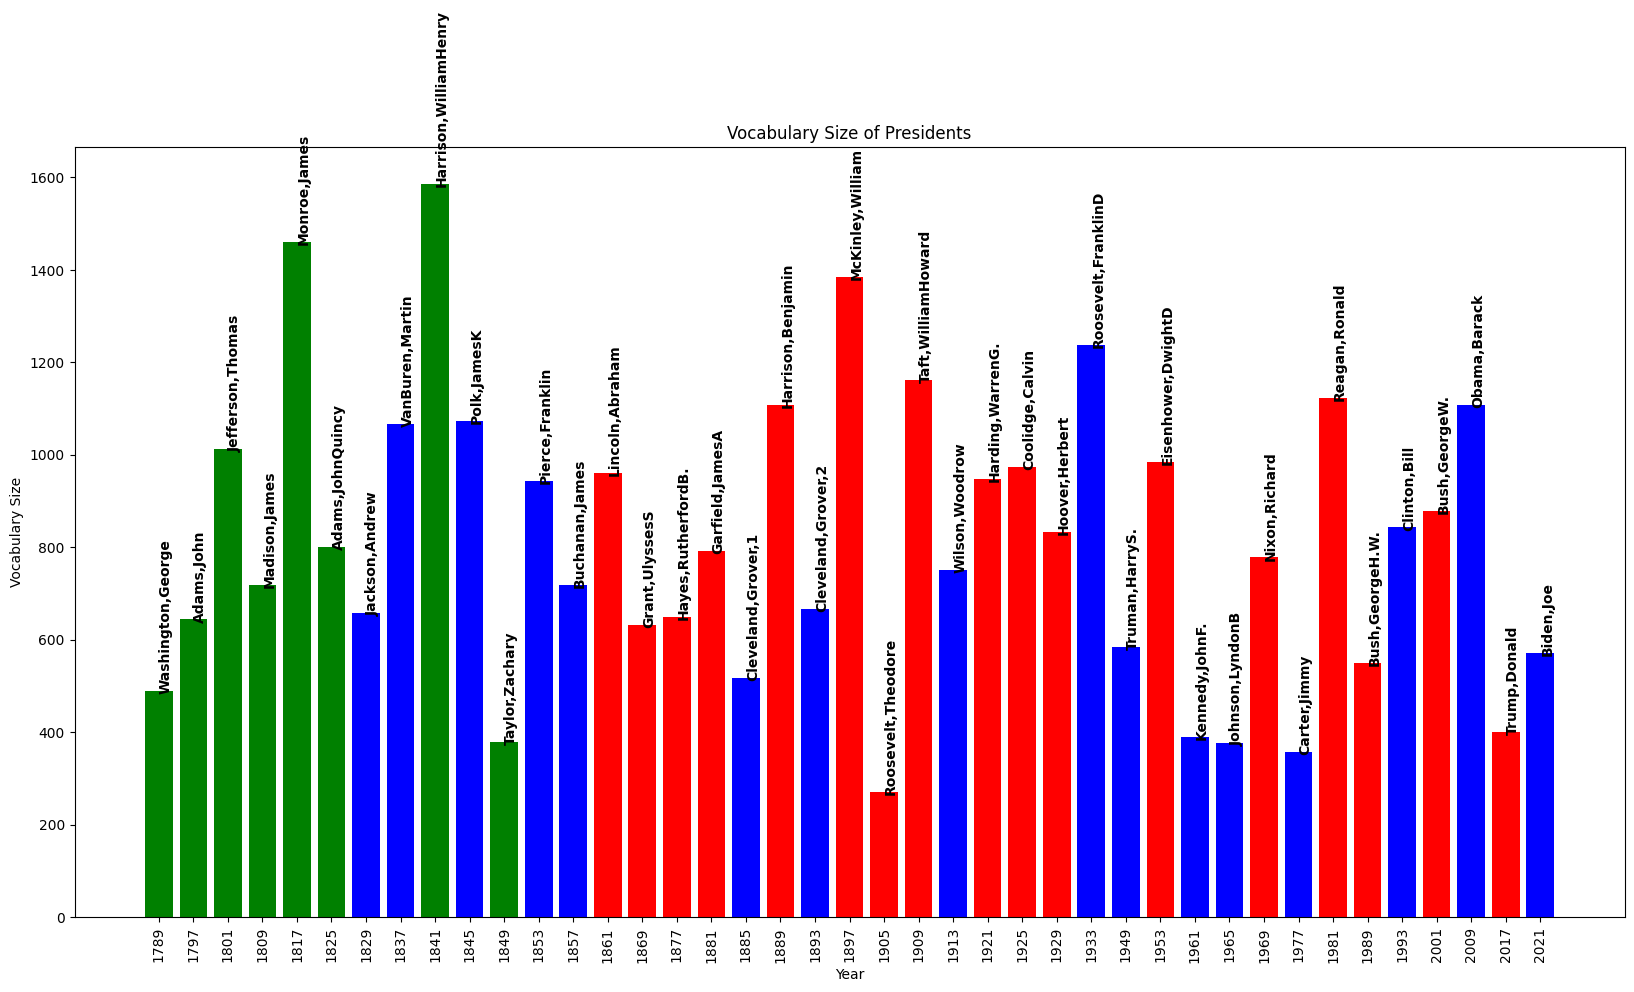

In [462]:
# create a bar plot using the presidents dictionary, x-axis should be the speech year, y-axis should be the vocab
# size of the president, and the color of the bar should be the party of the president

plt.figure(figsize=(20, 10))
for president in presidents:
    # for speech in presidents[president]['speeches']:
    speech = presidents[president]['speeches'][0]
    year = speech.split('-')[0]
    
    # if Republic color red, if democrat color blue, if other color green
    if presidents[president]['party'] == 'Republican Party (United States)':
        color = 'red'
    elif presidents[president]['party'] == 'Democratic Party (United States)':
        color = 'blue'
    else:
        color = 'green'

    plt.bar(year, presidents[president]['vocab'], color=color)
    plt.text(year, presidents[president]['vocab'], president, rotation=90, fontsize=10, fontweight='bold')

plt.title('Vocabulary Size of Presidents')
plt.xlabel('Year')
plt.ylabel('Vocabulary Size')

plt.xticks(rotation=90)
plt.show()

## 3. What are the five most frequently used words (exclusive of stop words) used by each president? What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents?

### Most common by president

In [465]:
for president in presidents:
    print(president, list(presidents[president]['most_common'].items())[:5])

Washington,George [('government', 9), ('citizens', 6), ('present', 6), ('country', 6), ('public', 6)]
Adams,John [('people', 20), ('government', 16), ('nations', 11), ('country', 10), ('nation', 9)]
Jefferson,Thomas [('public', 35), ('citizens', 41), ('fellow', 31), ('government', 67), ('shall', 13)]
Madison,James [('country', 9), ('public', 8), ('united', 8), ('states', 8), ('nations', 7)]
Monroe,James [('great', 50), ('states', 41), ('government', 35), ('united', 29), ('people', 26)]
Adams,JohnQuincy [('union', 20), ('government', 17), ('country', 10), ('rights', 10), ('peace', 9)]
Jackson,Andrew [('government', 173), ('people', 208), ('public', 30), ('states', 84), ('union', 61)]
VanBuren,Martin [('people', 20), ('institutions', 16), ('government', 16), ('country', 15), ('experience', 8)]
Harrison,WilliamHenry [('power', 47), ('people', 41), ('constitution', 40), ('government', 43), ('citizens', 27)]
Polk,JamesK [('government', 47), ('states', 36), ('union', 32), ('people', 16), ('p

### Most common by party

In [467]:
for party in parties:
    common = sorted(list(parties[party]['most_common'].items()), key=lambda x: x[1], reverse=True)[:5]
    print(party, common)

unaffiliated [('government', 9), ('citizens', 6), ('present', 6), ('country', 6), ('public', 6)]
Federalist Party [('people', 20), ('government', 16), ('nations', 11), ('country', 10), ('nation', 9)]
Democratic-Republican Party [('government', 67), ('great', 59), ('states', 49), ('citizens', 41), ('united', 37)]
Democratic Party (United States) [('people', 208), ('government', 173), ('nation', 121), ('world', 97), ('shall', 86)]
Whig Party (United States) [('power', 47), ('government', 43), ('people', 41), ('constitution', 40), ('country', 30)]
Republican Party (United States) [('people', 245), ('government', 245), ('world', 171), ('great', 111), ('america', 105)]


# 4. Key themes by president

In [469]:
# Extract the key themes of each president's speeches
for president in presidents:
    themes = dict()
    for speech in presidents[president]['speeches']:
        text = inaugural.raw(speech)
        text = clean_text(text)
        doc = nlp(text)
        for token in doc:
            if token.pos_ == 'NOUN':
                if token.text not in themes:
                    themes[token.text] = 1
                else:
                    themes[token.text] += 1
    presidents[president]['themes'] = {key:val for key,val in (sorted(themes.items(), key=lambda x: x[1], reverse=True)[:10])}

for president in presidents:
    print(president, presidents[president]['themes'])

Washington,George {'government': 9, 'citizens': 6, 'country': 6, 'people': 5, 'duty': 4, 'hand': 3, 'voice': 3, 'nature': 3, 'administration': 3, 'confidence': 3}
Adams,John {'people': 20, 'government': 16, 'nations': 11, 'country': 10, 'nation': 9, 'constitution': 8, 'justice': 6, 'states': 6, 'mind': 6, 'honor': 6}
Jefferson,Thomas {'citizens': 17, 'government': 15, 'state': 10, 'others': 9, 'peace': 9, 'country': 8, 'constitution': 8, 'man': 8, 'power': 7, 'safety': 7}
Madison,James {'war': 16, 'country': 9, 'nations': 7, 'nation': 6, 'rights': 6, 'spirit': 6, 'confidence': 5, 'justice': 5, 'citizens': 5, 'sense': 4}
Monroe,James {'government': 35, 'people': 26, 'war': 26, 'citizens': 24, 'force': 18, 'peace': 16, 'union': 15, 'country': 15, 'commerce': 14, 'power': 14}
Adams,JohnQuincy {'union': 20, 'government': 17, 'country': 10, 'rights': 10, 'peace': 9, 'constitution': 8, 'nation': 8, 'people': 7, 'nations': 7, 'duties': 6}
Jackson,Andrew {'government': 19, 'people': 13, 'union

# 5. Compute a sentiment score and barplot the sentiment score for each president. Color code this barplot as blue for Democrat, red for Republican, and gray for Others.

In [476]:
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [477]:
# Compute the sentiment score of each president's speeches
for president in presidents:
    sentiment = 0
    for speech in presidents[president]['speeches']:
        text = inaugural.raw(speech)
        text = clean_text(text)
        doc = nlp(text)
        sentiment += doc._.polarity
    presidents[president]['sentiment'] = sentiment

for president in presidents:
    print(president, presidents[president]['sentiment'])

Washington,George 0.21687767653493456
Adams,John 0.1725144652095871
Jefferson,Thomas 0.3575629135796389
Madison,James 0.3225359713940702
Monroe,James 0.42816293650309245
Adams,JohnQuincy 0.14962638604085973
Jackson,Andrew 0.2921987478944175
VanBuren,Martin 0.12833405061475245
Harrison,WilliamHenry 0.15114595845816503
Polk,JamesK 0.15883953983401497
Taylor,Zachary 0.16774426155240107
Pierce,Franklin 0.14739114264887465
Buchanan,James 0.1824416318145132
Lincoln,Abraham 0.2048687913907285
Grant,UlyssesS 0.41992128226644465
Hayes,RutherfordB. 0.16374339758773718
Garfield,JamesA 0.16183523849422463
Cleveland,Grover,1 0.20128613053613048
Harrison,Benjamin 0.1777525066090958
Cleveland,Grover,2 0.12864333155429042
McKinley,William 0.35161028887696766
Roosevelt,Theodore 0.14200352504638222
Taft,WilliamHoward 0.1338675989682702
Wilson,Woodrow 0.3742925440492863
Harding,WarrenG. 0.14649601967070586
Coolidge,Calvin 0.1760570624874423
Hoover,Herbert 0.14471279721279726
Roosevelt,FranklinD 0.4616430

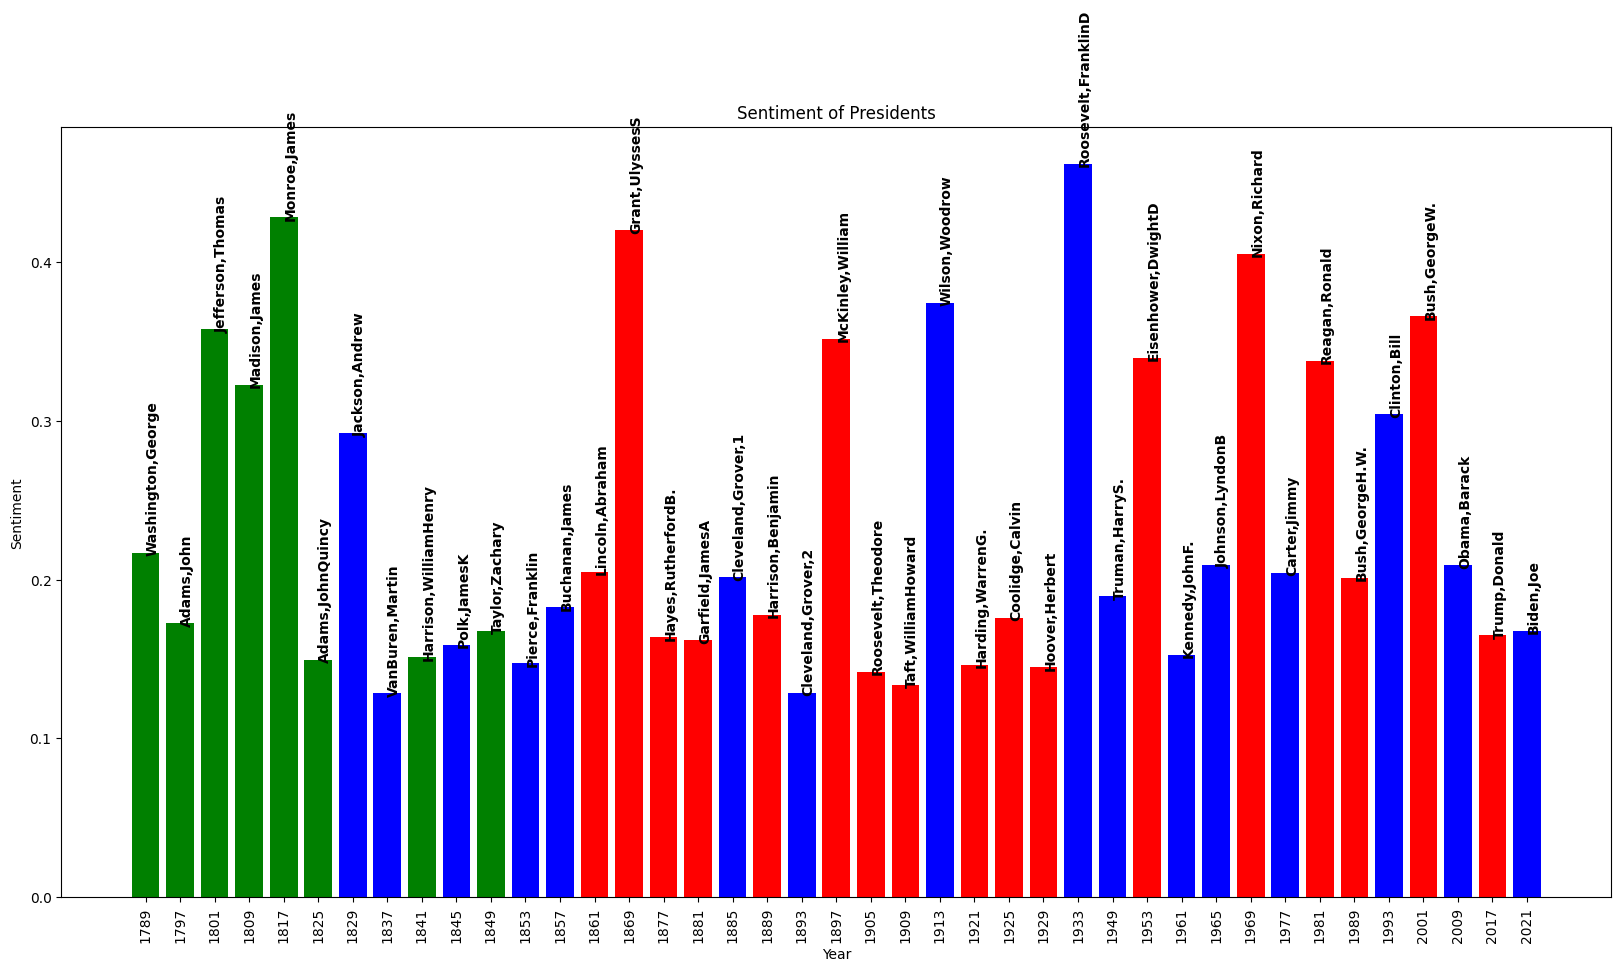

In [480]:
# Bar plot of the sentiment score of each president's speeches
plt.figure(figsize=(20, 10))
for president in presidents:
    # for speech in presidents[president]['speeches']:
    speech = presidents[president]['speeches'][0]
    year = speech.split('-')[0]
    sentiment = presidents[president]['sentiment']
    # if Republic color red, if democrat color blue, if other color green
    if presidents[president]['party'] == 'Republican Party (United States)':
        color = 'red'
    elif presidents[president]['party'] == 'Democratic Party (United States)':
        color = 'blue'
    else:
        color = 'green'

    plt.bar(year, sentiment, color=color)
    plt.text(year, sentiment, president, rotation=90, fontsize=10, fontweight='bold')

plt.title('Sentiment of Presidents')
plt.xlabel('Year')
plt.ylabel('Sentiment')

plt.xticks(rotation=90)
plt.show()


In [481]:
# export the presidents dictionary to a json file
with open('presidents.json', 'w') as f:
    json.dump(presidents, f, indent=4)